In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [371]:
df = pd.read_csv('carprice.csv')

In [372]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [374]:
def num_cat_identify(df):
    num_col = []
    cat_col = []
    for col in df.columns:
        if df[col].dtypes in [np.int64,np.float64,np.int32]:
            num_col.append(col)
        else:
            cat_col.append(col)
    return num_col, cat_col

In [375]:
num_col, cat_col = num_cat_identify(df)

In [376]:
for col in cat_col:
    print(df[col].value_counts())
    print('\n')

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64


Model
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: count, Length: 1590, dtype: int64


Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: count, dtype: int64


Leather interior
Yes    13954
No      5283
Name: count, dtype: int64



In [377]:
df['Levy'].replace({'-':np.nan},inplace=True)
df['Levy'] = df['Levy'].astype(float)

In [378]:
df['Levy'].fillna(np.mean(df['Levy']),inplace=True)

In [379]:
def engine_clean(x):
    if 'Turbo' in x:
        return float(x.split(' ')[0])
    else:
        return float(x)
def mileage_clean(x):
    return int(x.split(' ')[0])

In [380]:
df['Engine volume'].iloc[1]

'3'

In [381]:
df['Engine volume'] = df['Engine volume'].apply(engine_clean)
df['Engine volume'] = df['Engine volume'].astype(float)

In [382]:
df['Engine volume'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Engine volume
Non-Null Count  Dtype  
--------------  -----  
19237 non-null  float64
dtypes: float64(1)
memory usage: 150.4 KB


In [383]:
df['Mileage'] = df['Mileage'].apply(mileage_clean)
df['Mileage'] = df['Mileage'].astype(int)

In [384]:
df['Mileage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Mileage
Non-Null Count  Dtype
--------------  -----
19237 non-null  int32
dtypes: int32(1)
memory usage: 75.3 KB


In [385]:
df['Doors'].replace({'04-May':4,'02-Mar':2,'>5':5},inplace=True)
df['Doors'] = df['Doors'].astype(int)

In [386]:
num_col, cat_col = num_cat_identify(df)

In [387]:
num_col

['ID',
 'Price',
 'Levy',
 'Prod. year',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Doors',
 'Airbags']

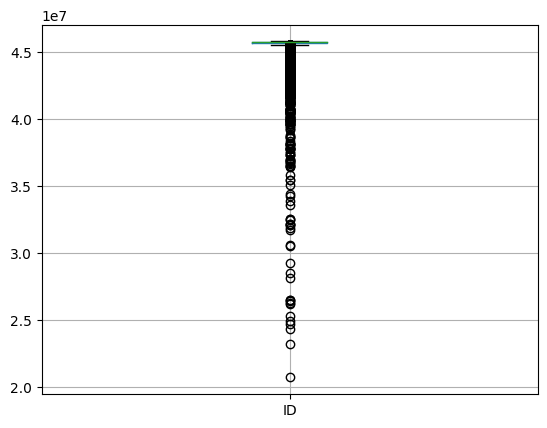

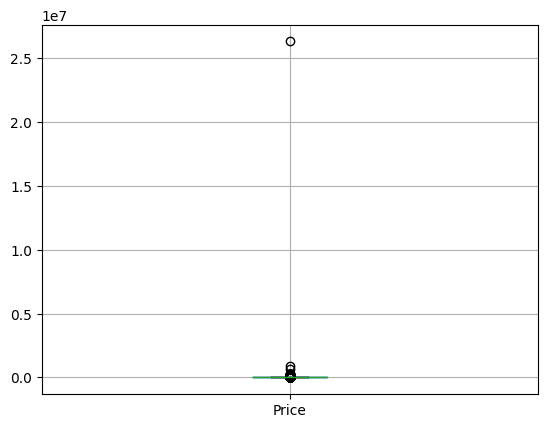

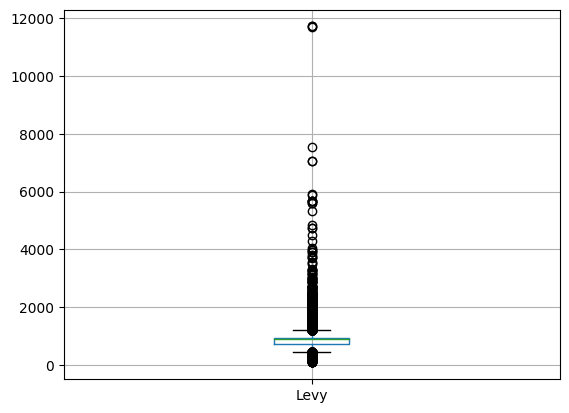

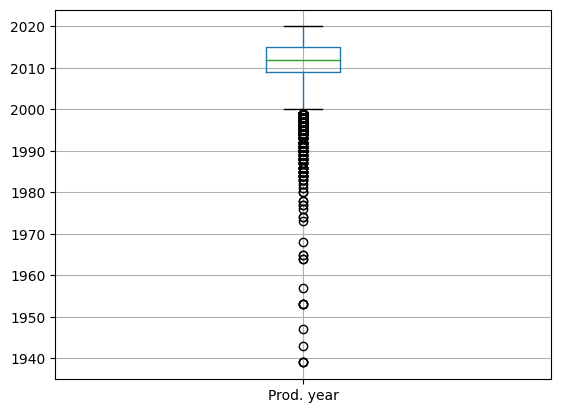

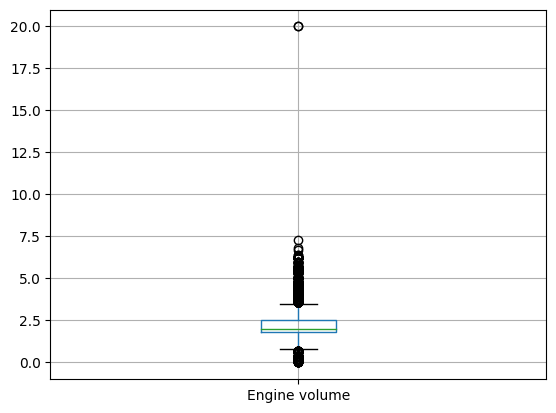

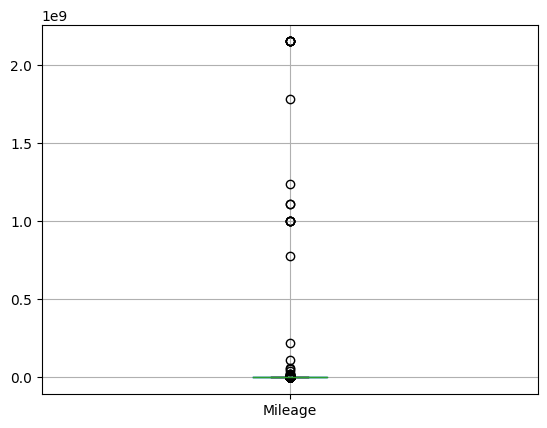

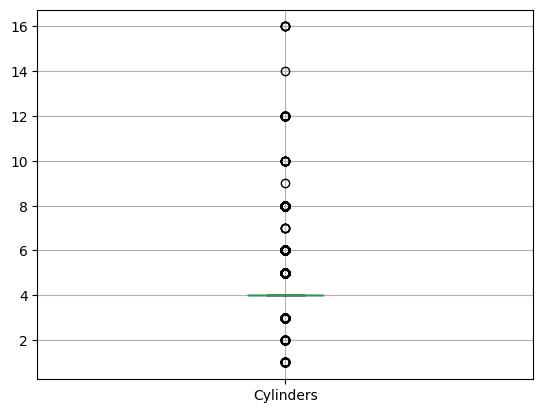

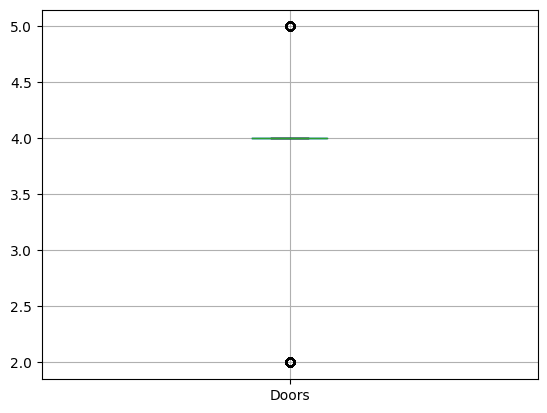

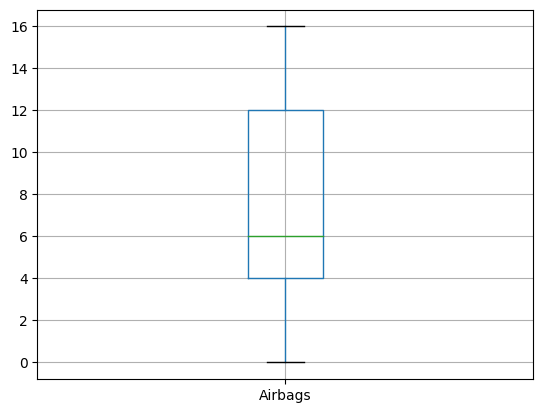

In [388]:
for col in num_col:
    df[[col]].boxplot()
    plt.show()

In [389]:
df = df[df['Price'] < 2*(10**7)]


In [390]:
df[df['Engine volume'] > 10]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2357,45803214,10036,5603.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20.0,333686,4.0,Automatic,Front,4,Left wheel,Silver,4
17777,45732659,10036,5603.0,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20.0,333686,4.0,Automatic,Front,4,Left wheel,Silver,4


In [391]:
df = df[df['Mileage'] < 0.5*(10**9)]

In [392]:
df.drop_duplicates(inplace=True)

In [393]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [394]:
df.drop(columns=['ID','Model'],inplace=True)

In [395]:
num_col,cat_col = num_cat_identify(df)

In [396]:
cat_col

['Manufacturer',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [397]:
df_ohe = pd.get_dummies(data=df,columns=cat_col,drop_first=True)

In [398]:
df_ohe

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.000000,2010,3.5,186005,6.0,4,12,False,False,...,False,False,False,False,False,False,True,False,False,False
1,16621,1018.000000,2011,3.0,192000,6.0,4,8,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8467,906.838128,2006,1.3,200000,4.0,4,2,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.000000,2011,2.5,168966,4.0,4,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11726,446.000000,2014,1.3,91901,4.0,4,4,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.838128,1999,2.0,300000,4.0,2,5,False,False,...,False,False,False,False,False,False,True,False,False,False
19233,15681,831.000000,2011,2.4,161600,4.0,4,8,False,False,...,False,False,False,False,False,True,False,False,False,False
19234,26108,836.000000,2010,2.0,116365,4.0,4,4,False,False,...,False,True,False,False,False,False,False,False,False,False
19235,5331,1288.000000,2007,2.0,51258,4.0,4,4,False,False,...,False,False,False,False,False,False,False,False,False,False


In [405]:
df_ohe.reset_index(drop=True,inplace=True)

In [406]:
df_ohe.isna().sum().sum()

0

In [407]:
std_scaler = StandardScaler()

In [408]:
y = df_ohe['Price']

In [409]:
len(y)

18906

In [411]:
df_scaled = std_scaler.fit_transform(df_ohe[num_col].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=num_col)

In [412]:
df_scaled

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
0,-0.195863,1.272224,-0.163786,1.359684,0.003441,1.182613,0.184419,1.256447
1,-0.029613,0.288284,0.013210,0.790071,0.006498,1.182613,0.184419,0.330873
2,-0.441274,0.001206,-0.871769,-1.146614,0.010577,-0.483382,0.184419,-1.057488
3,-0.686635,-0.114589,0.013210,0.220458,-0.005248,-0.483382,0.184419,-1.520275
4,-0.276741,-1.188917,0.544197,-1.146614,-0.044546,-0.483382,0.184419,-0.594701
...,...,...,...,...,...,...,...,...
18901,-0.441274,0.001206,-2.110739,-0.349155,0.061570,-0.483382,-4.768179,-0.363307
18902,-0.077070,-0.194647,0.013210,0.106535,-0.009004,-0.483382,0.184419,0.330873
18903,0.449345,-0.181734,-0.163786,-0.349155,-0.032071,-0.483382,0.184419,-0.594701
18904,-0.599597,0.985565,-0.694773,-0.349155,-0.065271,-0.483382,0.184419,-0.594701


In [414]:
df_ohe.drop(columns=num_col,inplace=True)

In [415]:
df_ohe

,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
18902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18903,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
18904,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [416]:
df_cleaned = pd.concat([df_scaled,df_ohe],axis=1)

In [418]:
df_cleaned.drop(columns=['Price'],inplace=True)

In [419]:
df_cleaned

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1.272224,-0.163786,1.359684,0.003441,1.182613,0.184419,1.256447,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.288284,0.013210,0.790071,0.006498,1.182613,0.184419,0.330873,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.001206,-0.871769,-1.146614,0.010577,-0.483382,0.184419,-1.057488,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.114589,0.013210,0.220458,-0.005248,-0.483382,0.184419,-1.520275,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-1.188917,0.544197,-1.146614,-0.044546,-0.483382,0.184419,-0.594701,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,0.001206,-2.110739,-0.349155,0.061570,-0.483382,-4.768179,-0.363307,False,False,False,...,False,False,False,False,False,False,True,False,False,False
18902,-0.194647,0.013210,0.106535,-0.009004,-0.483382,0.184419,0.330873,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18903,-0.181734,-0.163786,-0.349155,-0.032071,-0.483382,0.184419,-0.594701,False,False,False,...,False,True,False,False,False,False,False,False,False,False
18904,0.985565,-0.694773,-0.349155,-0.065271,-0.483382,0.184419,-0.594701,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [421]:
X = df_cleaned.values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

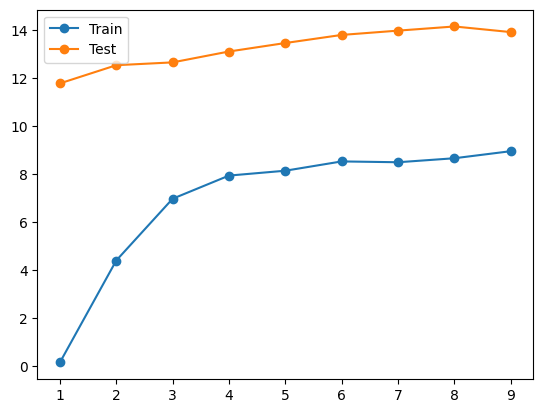

In [428]:
kvalues = np.arange(1,10)
train_error = []
test_error = []

for i in kvalues:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_error.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_error.append(mean_absolute_percentage_error(y_test,y_test_pred))

plt.plot(kvalues, train_error,label = 'Train',marker='o')
plt.plot(kvalues, test_error, label = 'Test', marker='o')
plt.legend()
plt.show()

### kFold CV

In [429]:
def kFoldCV_user_defined(X):
    X = np.arange(len(X))
    var1 = int(np.ceil(len(X)/split))
    var2 = int(np.floor(len(X)/split))
    rem = len(X)%split
    count = 0
    train_ind = []
    test_ind = []
    for j in range(rem):
        temp = X[count*var1:var1*(count+1)]
        temp_diff = list(set(X).symmetric_difference(set(temp)))
        test_ind.append(list(temp))
        train_ind.append(temp_diff)
        count+=1
    if var1 != var2:
        count = test_ind[-1][-1] +1
    else:
        count = 0
    for k in range(split-rem):
        temp = X[count+var2*k:count+var2*(k+1)]
        temp_diff = list(set(X).symmetric_difference(set(temp)))
        test_ind.append(list(temp))
        train_ind.append(temp_diff)
    # for i in range(split):
    #     print(f'TRAIN: {train_ind[i]}  TEST: {test_ind[i]}')
    return train_ind, test_ind

17015 1891


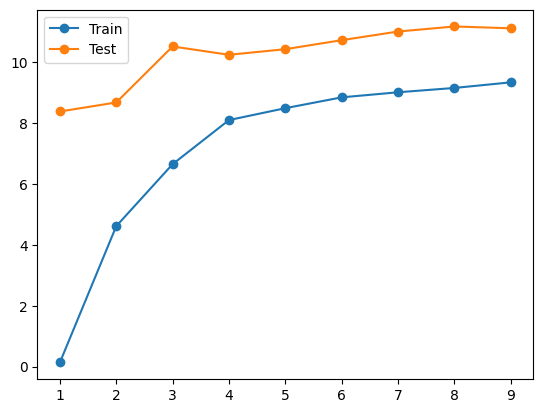

17015 1891


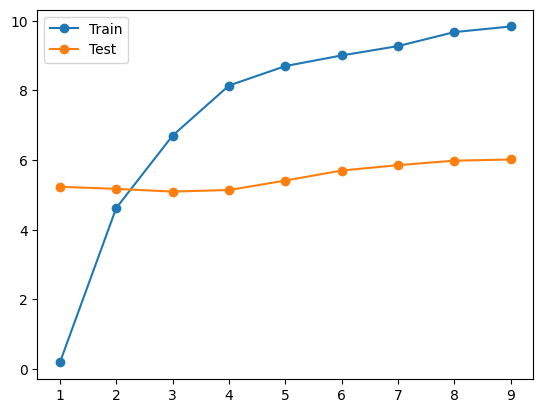

17015 1891


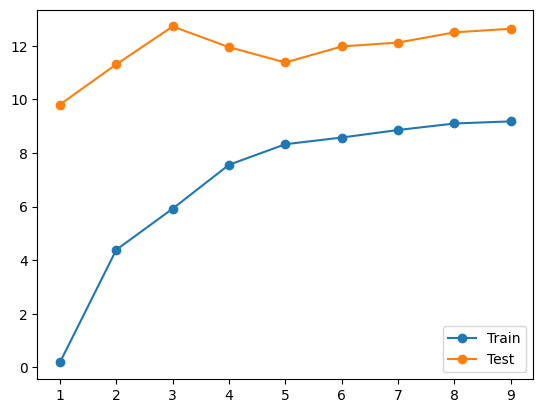

17015 1891


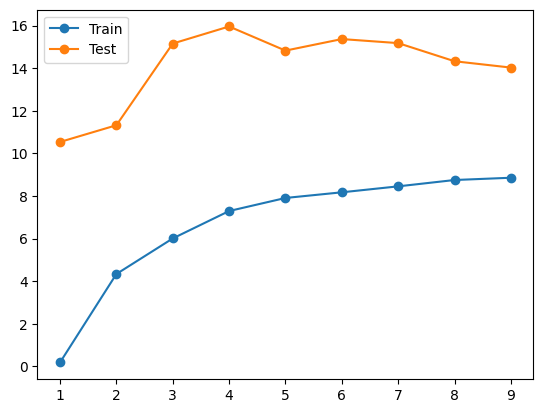

17015 1891


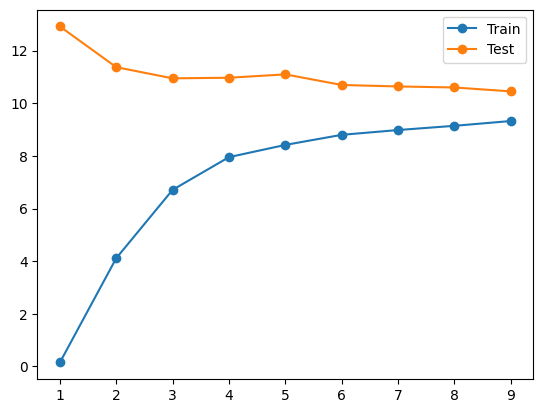

17015 1891


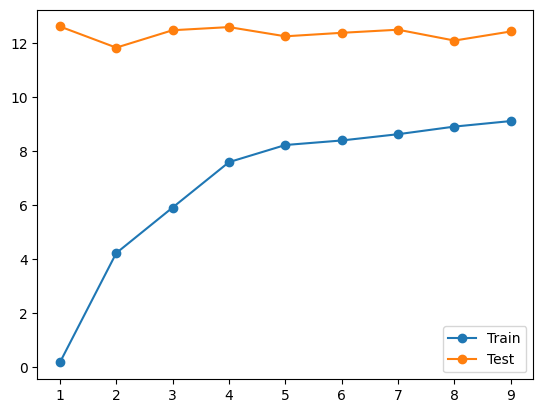

17016 1890


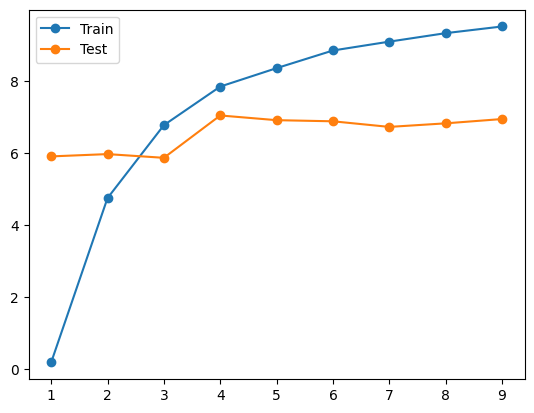

17016 1890


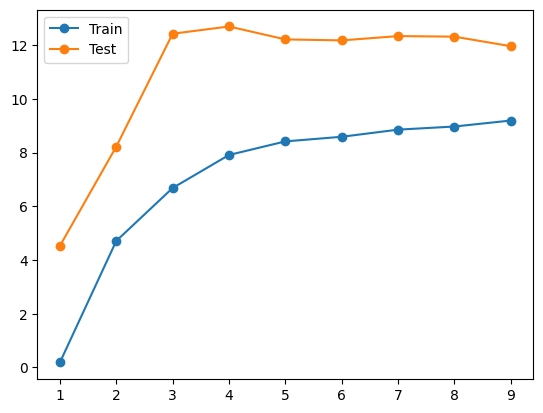

17016 1890


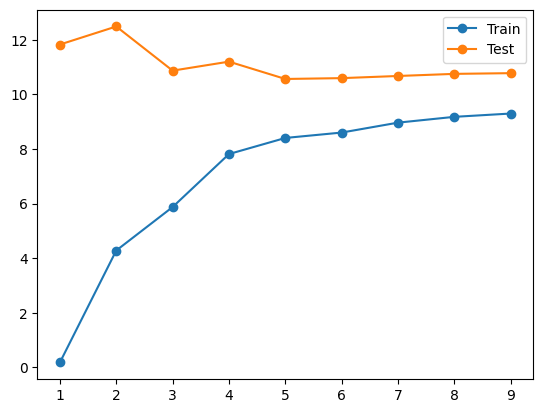

17016 1890


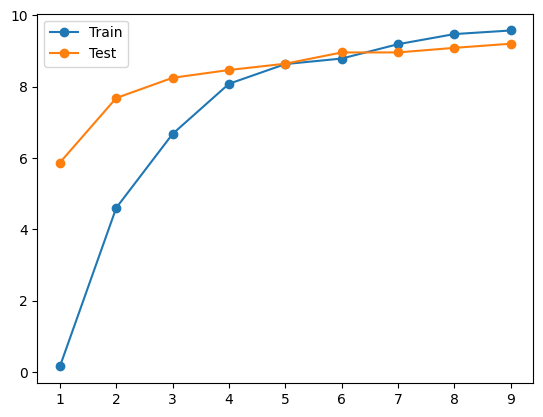

In [430]:
split = 10
train_ind, test_ind = kFoldCV_user_defined(X)
kvalues = np.arange(1,10)
for i in range(len(train_ind)):
    # print("TRAIN:", train_index[i], "TEST:", test_index[i])
    X_train, X_test = X[train_ind[i]], X[test_ind[i]]
    y_train, y_test = y[train_ind[i]], y[test_ind[i]]
    train_error = []
    test_error = []
    print(len(X_train),len(X_test))
    for i in kvalues:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train,y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_error.append(mean_absolute_percentage_error(y_train,y_train_pred))
        test_error.append(mean_absolute_percentage_error(y_test,y_test_pred))
    
    plt.plot(kvalues, train_error,label = 'Train',marker='o')
    plt.plot(kvalues, test_error, label = 'Test', marker='o')
    plt.legend()
    plt.show()